In [1]:
import os, sys, torch
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from v5.classification import ModelTrainer
import matplotlib.pyplot as plt
from constants import *

In [2]:
dropout = 0.2
chk_path = MODEL_DIR + '/last.pth'
trainer = ModelTrainer(D2_TEST_SC_DIR, DEVICE, MODEL_DIR, chk_path, BATCH_SIZE, NUM_EPOCHS, LR, MOMENTUM, WEIGHT_DECAY, MODEL, PREDICTION_ONLY, CLASS_WEIGHTS, DROPOUT, None, PATIENCE, DELTA, NUM_CLASSES, FREEZE_LAYERS)

Loading checkpoint from /workspace/code/weights/d2_unbalanced/sce_RESNET18/v4.0/last.pth


Max Train Accuracy: 1.0
Max Val Accuracy: 0.8629057674125433


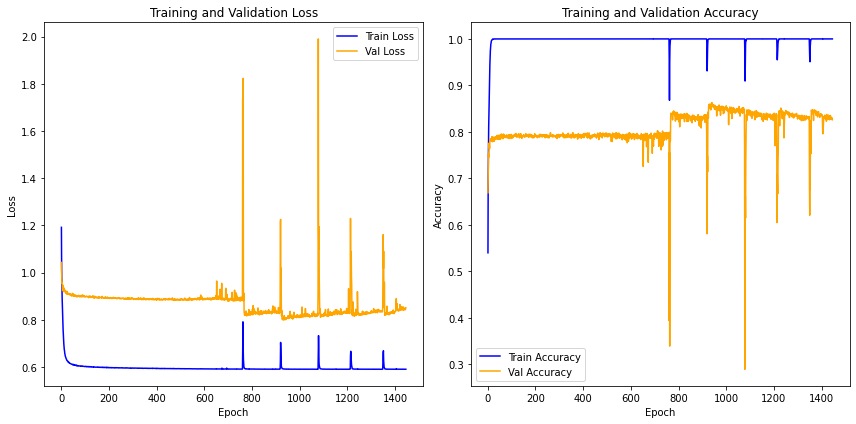

In [3]:
epochs = len(trainer.training_stats['train_loss'])
train_acc = [acc.cpu().item() if isinstance(acc, torch.Tensor) else acc for acc in trainer.training_stats['train_acc']]
val_acc = [acc.cpu().item() if isinstance(acc, torch.Tensor) else acc for acc in trainer.training_stats['val_acc']]

print("Max Train Accuracy:", max(train_acc))
print("Max Val Accuracy:", max(val_acc))

plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), trainer.training_stats['train_loss'], label='Train Loss', color='blue')
plt.plot(range(1, epochs + 1), trainer.training_stats['val_loss'], label='Val Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Train Accuracy', color='blue')
plt.plot(range(1, epochs + 1), val_acc, label='Val Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()